# Analyse des sentiments Twitter avec NLTK et GetOldTweets

In [1]:
import matplotlib.pyplot as plt
from collections import Counter
import string

from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

%run twitter_analysis.ipynb

## Obtenir des tweets en utilisant l'internet

#### la fonction 'get_tweets' a deux paramètres
#### le 1er est le mots a rechercher
#### le 2eme le nombre maximum des tweet

In [2]:
 text = ""
 text_tweets = get_tweets("covid19",200)
 length = len(text_tweets)

 for i in range(0, length):
     text = text_tweets[i][0] + " " + text
text

'She\'s trying to distract attention from Britain\'s status as 2nd highest covid19 death rate in world by starting an international incident, hopefully leading to war, because she knows it is illegal to wear a mask in France. If even #one of our @astros are not cleared for #COVID19 ...SHUT IT DOWN. #wearehouston #BeSafe Surely we would be asking more questions no? Of course not, because it was the 3rd biggest hoax, behind Covid19 and 911. That\'s why people. The #democrats are weaponizing #COVID19 Está recaudando bien ! Gracias a Covid19 DEAR CANADIANS: The Canada-United States border will remain closed for non-essential travel until at least August 21st 2020 #COVID19 #StayAtHomeSaveLives #StayHome #StayAtHome #ijcovid19 #drkemiolunloyo Seguimos venciendo al covid en #Nicaragua juntos contra el #COVID19 @ElCuervoNica @GuerreroCuba @taniasandinista @FloryCantoX @CamilaPlomo @LunaSandinista8 @TPU19J @ChalecosAmarill @indio_nica @BayamoSomos @CubanoAPie2 @GarrielSoler El riesgo de enferma

### ecriture des tweet dans le fichier read.txt

In [3]:
 fichier_texte = open("read.txt",  "w", encoding='utf-8' )
 fichier_texte.write(text) 
 fichier_texte.close()

### ouverture et lecture du fichier read.txt qui contient les tweets

In [4]:

text = open('read.txt', encoding='utf-8').read()

### conversion en minuscules

In [5]:

lower_case = text.lower()

### Suppression des ponctuations

In [6]:

cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

### Utilisation word_tokenize plus rapide que split ()

In [7]:

tokenized_words = word_tokenize(cleaned_text, "english")

### Suppression Stop Words

In [8]:

final_words = []
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

### Lemmatization - From plural to single + Base form of a word (example better-> good)

In [9]:
lemma_words = []
for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

emotion_list = []

## NLP Emotion Algorithm
##### 1) Check if the word in the final word list is also present in emotion.txt
#####  - open the emotion file
#####  - Loop through each line and clear it
#####  - Extract the word and emotion using split

##### 2) If word is present -> Add the emotion to emotion_list
##### 3) Finally count each emotion in the emotion list

In [10]:
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in lemma_words:
            emotion_list.append(emotion)

print(emotion_list)
w = Counter(emotion_list)
print(w)

[' powerless', ' adequate', ' attached', ' free', ' happy', ' entitled', ' happy', ' lost', ' sad', ' free', ' adequate', ' sad', ' sad', ' entitled', ' alone', ' happy', ' happy', ' sad', ' entitled']
Counter({' happy': 4, ' sad': 4, ' entitled': 3, ' adequate': 2, ' free': 2, ' powerless': 1, ' attached': 1, ' lost': 1, ' alone': 1})


### Definition de la fontction sentiment_analyse()

In [11]:
def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        print("Negative Sentiment")
    elif score['neg'] < score['pos']:
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")

### Call sentiment_analyse()

In [12]:
sentiment_analyse(cleaned_text)

Positive Sentiment


### Tracer les émotions sur le graphique

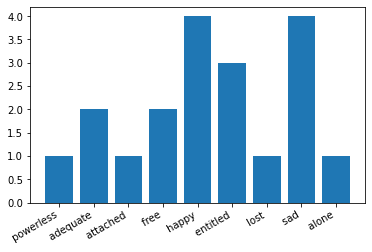

In [13]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()